<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/daniel_benson_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# First create our sales list
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]


In [0]:
# Create our function for mean, variance, and standard deviation
def mean(list):
  return (sum(list)/len(list))

def variance(mean, list):
  distance_list = []
  squared_dist = []
  for num in list:
    distance_list.append(num-mean)
  for num in distance_list:
    squared_dist.append(num**2)
  observations = len(squared_dist)
  variance_list = sum(squared_dist)/observations
  return variance_list

def stand_dev(var_list):
  std = var_list**(.5)
  return std



In [0]:
# Let's check that this worked using the example from lecture
widgets = [451, 330, 570, 390, 410]

In [0]:
widget_mean = mean(widgets)
'{:.2f}'.format(widget_mean)

'430.20'

In [0]:
widget_var = variance(widget_mean, widgets)
'{:.2f}'.format(widget_var)

'6408.16'

In [0]:
widget_std = stand_dev(widget_var)
'{:.2f}'.format(widget_std)

'80.05'

In [0]:
# It works! Let's use it on our list now.
sales_mean = mean(sales)
sales_variance = variance(sales_mean, sales)
sales_std = stand_dev(sales_variance)
print("Mean: ", '{:.2f}'.format(sales_mean))
print("Variance: ", '{:.2f}'.format(sales_variance))
print("Standard Deviation: ", '{:.2f}'.format(sales_std))

Mean:  3052.71
Variance:  183761.06
Standard Deviation:  428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# Imports
import numpy as np
import pandas as pd

In [0]:
# Let's make our visited customers list
num_customers = [127, 80, 105, 92, 120, 115, 93]

In [0]:
sales_cust_covar = np.cov(sales, num_customers)[0][1]
print('{:.2f}'.format(sales_cust_covar))

7604.36


In [0]:
np.cov(sales, num_customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# First find the std of number customers
num_cust_mean = mean(num_customers)
num_cust_var = variance(num_cust_mean, num_customers)
num_cust_std = stand_dev(num_cust_var)
print(num_cust_std)
# Check that against library function
np.std(num_customers)

15.792015549069118


15.792015549069118

In [0]:
# Create a function that calculates correlation coefficient
def corr_coef(std1, std2, covar):
  return covar / (std1*std2)


In [0]:
# Now calculate the correlation coefficient!
corr_coefficient = corr_coef(sales_std, num_cust_std, sales_cust_covar)
print('{:.6f}'.format(corr_coefficient))

1.123306


In [0]:
np.corrcoef(sales, num_customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
# Read in the dataset, removing the index column
titanic_df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv", index_col=0)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# Calculate the covariance of the entire set
titanic_df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
# Calculate the correlation of the entire dataset
titanic_df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
# A synonym for orthogonal is perpendicular; they are vectors that are at right angles of each other:
# |__ 

In [0]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Function to create random 1-Dimensional vector
def vector_1D_creator(columns):
  return np.random.randn(columns)

In [0]:
vec1 = vector_1D_creator(3)
vec2 = vector_1D_creator(3)
print(vec1)
print(vec2)

[-0.3436257  -0.30045605  1.15722614]
[ 1.78812135e-04 -2.29419204e+00  1.20999827e+00]


In [0]:
# Function that calculates the orthogonal vector of vector 1
def orth_calc(vec1, vec2):
  vec2 -= vec2.dot(vec1) * vec1 / np.linalg.norm(vec1)**2
  return vec2

In [0]:
# Let's test out our function to see if it works correctly
print(orth_calc(vec1, vec2))
'{:.6f}'.format(vec2.dot(vec1))

[ 0.4641458  -1.88851317 -0.35250049]


'0.000000'

In [0]:
# Let's see that visually! First let's create a function that can take 
# two vectors and print out their plot
def vec_plotter(vector1, vector2):
  vec2 = orth_calc(vector1, vector2)
  fig, ax = plt.subplots(figsize=(4,4))
  ax.grid()
  plt.xlim(-2,3)
  plt.ylim(-2,3)

  for vect in [vector1, vector2]:
    plt.arrow(0, 0,
              vect[0],
              vect[1],
              head_width=.2,
              head_length=.2,
              linewidth=4,
              color='green')



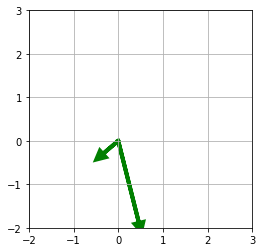

In [0]:
# Use our function to graph the above example
vec_plotter(vec1, vec2)

In [0]:
# Let's try a second example
vec3 = vector_1D_creator(4)
vec4 = vector_1D_creator(4)
print(vec3)
print(vec4)

[ 0.50457207  0.87156075 -0.64838088  0.4104645 ]
[ 0.32027098 -0.24897293  0.05267784  0.94852942]


In [0]:
# Run second example through orthogonal calculator
print(orth_calc(vec3, vec4))
'{:.6f}'.format(vec4.dot(vec3))

[ 0.22591308 -0.41195984  0.17392881  0.87177018]


'-0.000000'

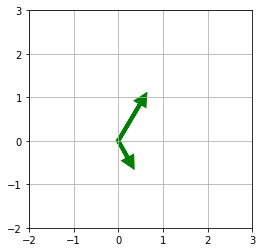

In [0]:
# Visualize second example
vec_plotter(vec3, vec4)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# Create our vectors first
a = np.array([[-5], [3], [7]])
b = np.array([[6], 
     [-8],
     [2]])
print(a, '\n\n', b)

[[-5]
 [ 3]
 [ 7]] 

 [[ 6]
 [-8]
 [ 2]]


In [0]:
# Let's create a function to calculate dot product of 3-Dimensional vectors
def vec_3D_dot(vector1, vector2):
  return (vector1[0]*vector2[0]) + (vector1[1]*vector2[1]) + (vector1[2]*vector2[2])

In [0]:
# Use that to determine dot product of the above vectors
vec_3D_dot(a, b)

array([-40])

In [0]:
# These vectors are definitely not orthoogonal to each other, with a 
# -40 dot product

In [0]:
# Should we visualize it? I think we should visualize it. Let's visualize it.
# Let's carry over a function from the previous assignment
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def matrix_3D_Grapher(columnnumbs, matrix, color1, color2, color3, xmin, xmax, ymin, ymax, zmin, zmax, matrix2=None, color4=None, color5=None, color6=None):
  if columnnumbs == 1:
    mat = np.array([[0, 0, 0, 0, 0, matrix[0]],
                   [0, 0, 0, 0, 0, matrix[1]],
                   [0, 0, 0, 0, 0, matrix[2]]])
    mat2 = np.array([[0, 0, 0, 0, 0, matrix2[0][0]],
                   [0, 0, 0, 0, 0, matrix2[1][0]],
                   [0, 0, 0, 0, 0, matrix2[2][0]]])
    
  if columnnumbs == 2:
    mat = np.array([[0, 0, 0, 0, matrix[0][0], matrix[0][1]],
                   [0, 0, 0, 0, matrix[1][0], matrix[1][1]],
                   [0, 0, 0, 0, matrix[2][0], matrix[2][1]]])
    mat2 = np.array([[0, 0, 0, 0, matrix2[0][0], matrix2[0][1]],
                   [0, 0, 0, 0, matrix2[1][0], matrix2[1][1]],
                   [0, 0, 0, 0, matrix2[2][0], matrix2[2][1]]])

  if columnnumbs == 3:
    mat = np.array([[0, 0, 0, matrix[0][0], matrix[0][1], matrix[0][2]],
                   [0, 0, 0, matrix[1][0], matrix[1][1], matrix[1][2]],
                   [0, 0, 0, matrix[2][0], matrix[2][1], matrix[2][2]]])
    mat2 = np.array([[0, 0, 0, matrix2[0][0], matrix2[0][1], matrix2[0][2]],
                   [0, 0, 0, matrix2[1][0], matrix2[1][1], matrix2[1][2]],
                   [0, 0, 0, matrix2[2][0], matrix2[2][1], matrix2[2][2]]])

  if columnnumbs == 4:
    mat = np.array([[0, 0, matrix[0][0], matrix[0][1], matrix[0][2], matrix[0][3]],
                   [0, 0, matrix[1][0], matrix[1][1], matrix[1][2], matrix[1][3]],
                   [0, 0, matrix[2][0], matrix[2][1], matrix[2][2], matrix[2][3]]])
    mat2 = np.array([[0, 0, matrix2[0][0], matrix2[0][1], matrix2[0][2], matrix2[0][3]],
                   [0, 0, matrix2[1][0], matrix2[1][1], matrix2[1][2], matrix2[1][3]],
                   [0, 0, matrix2[2][0], matrix2[2][1], matrix2[2][2], matrix2[2][3]]])

  if columnnumbs == 5:
    mat = np.array([[0, matrix[0][0], matrix[0][1], matrix[0][2], matrix[0][3], matrix[0][4]],
                   [0, matrix[1][0], matrix[1][1], matrix[1][2], matrix[1][3], matrix[1][4]],
                   [0, matrix[2][0], matrix[2][1], matrix[2][2], matrix[2][3], matrix[2][4]]])
    mat2 = np.array([[0, matrix2[0][0], matrix2[0][1], matrix2[0][2], matrix2[0][3], matrix2[0][4]],
                   [0, matrix2[1][0], matrix2[1][1], matrix2[1][2], matrix2[1][3], matrix2[1][4]],
                   [0, matrix2[2][0], matrix2[2][1], matrix2[2][2], matrix2[2][3], matrix2[2][4]]])

  if columnnumbs == 6:
    mat = np.array([[matrix[0][0], matrix[0][1], matrix[0][2], matrix[0][3], matrix[0][4], matrix[0][5]],
                   [matrix[1][0], matrix[1][1], matrix[1][2], matrix[1][3], matrix[1][4], matrix[1][5]],
                   [matrix[2][0], matrix[2][1], matrix[2][2], matrix[2][3], matrix[2][4], matrix[2][5]]])
    mat2 = np.array([[matrix2[0][0], matrix2[0][1], matrix2[0][2], matrix2[0][3], matrix2[0][4], matrix2[0][5]],
                   [matrix2[1][0], matrix2[1][1], matrix2[1][2], matrix2[1][3], matrix2[1][4], matrix2[1][5]],
                   [matrix2[2][0], matrix2[2][1], matrix2[2][2], matrix2[2][3], matrix2[2][4], matrix2[2][5]]])

  X, Y, Z, U, V, W = zip(*mat)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.quiver(X[0], Y[0], Z[0], U[0], V[0], W[0], length=1, color=color1)
  ax.quiver(X[1], Y[1], Z[1], U[1], V[1], W[1], length=1, color=color2)
  ax.quiver(X[2], Y[2], Z[2], U[2], V[2], W[2], length=1, color=color3)

  if matrix2.any:
    X, Y, Z, U, V, W = zip(*mat2)
    ax.quiver(X[0], Y[0], Z[0], U[0], V[0], W[0], length=1, color=color4)
    ax.quiver(X[1], Y[1], Z[1], U[1], V[1], W[1], length=1, color=color5)
    ax.quiver(X[2], Y[2], Z[2], U[2], V[2], W[2], length=1, color=color6)

  ax.set_xlim([xmin, xmax])
  ax.set_ylim([ymin, ymax])
  ax.set_zlim([zmin, zmax])
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  plt.show()

In [0]:
matrix_3D_Grapher(1, a, 'red', 'blue', 'green', -5, 5, -5, 5, -5, 5)
matrix_3D_Grapher(1, b, 'silver', 'gold', 'brown', -5, 5, -5, 5, -5, 5)

TypeError: ignored

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# First create our vector
c = np.array([2, -15, 6, 20])

In [0]:
# Let's first compute the square of the norm
np.linalg.norm(c)**2

In [0]:
# Now let's multiply c by itself
c.dot(c)

In [0]:
# Finally let's find cTc
c.dot(c.T)

In [0]:
# We find, interestingly, that the value of each of the equations above 
# outputs 665.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
# First we have to find the vector's norm. 
f = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(f)
f_norm

In [0]:
# Now to convert f into a unit vector we divide the vector by its norm:
f_hat = (1/f_norm) * f
f_hat

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
import random
import math

In [0]:
# Function that creates a random 3-Dimensional vector
def vector_3D_creator(min, max, numcolumns=3):
  first_row = []
  second_row = []
  third_row = []
  for count in range (numcolumns):
    first_row.append(random.randint(min,max))
    second_row.append(random.randint(min,max))
    third_row.append(random.randint(min,max))
  return np.array([first_row,
                  second_row,
                   third_row])
  

In [0]:
# Function that creates linearly dependent vector from given vector
def lin_depend(vec, scale):
  vec2 = np.multiply(vec, scale)
  return vec2

In [0]:
# Let's test it out!
vec1 = vector_3D_creator(0, 10)
print(vec1)
vec2 = lin_depend(vec1, 2)
print('\n\n', vec2)

In [0]:
# Let's graph them to ensure they are indeed linearly dependent
matrix_3D_Grapher(3, vec1, 'red', 'orange', 'blue', 0, 10, 0, 10, 0, 10, vec2, 'gold', 'purple', 'magenta')

In [0]:
# We can see from the graph that the two 3-Dimenional vectors are definitely linearly dependent

In [0]:
# Let's create one more linearly dependent set
vec1 = vector_3D_creator(0, 50, 2)
print(vec1)
vec2 = lin_depend(vec1, 2)
print('\n', vec2)

In [0]:
# Now let's print that
matrix_3D_Grapher(2, vec1, 'magenta', 'red', 'orange', 0, 100, 0, 100, 0, 100, vec2, 'brown', 'purple', 'black')

In [0]:
# Now let's create some vectors that are linearly independent
vect1 = vector_3D_creator(-5, 5)
vect2 = vector_3D_creator(-5, 5)
print(vect1)
print('\n', vect2)

In [0]:
# Now graph them
matrix_3D_Grapher(3, vect1, 'green', 'red', 'orange', -5, 5, -5, 5, -5, 5, vect2, 'black', 'brown', 'gray')

In [0]:
# Now let's create one more example of linearly independent vectors
vect1 = vector_3D_creator(500, 1000, 6)
vect2 = vector_3D_creator(500, 1000, 6)
print(vect1)
print('\n', vect2)

In [0]:
# Now graph them
matrix_3D_Grapher(6, vect1, 'magenta', 'green', 'pink', 600, 1200, 600, 1200, 600, 1200, vect2, 'orange', 'tan', 'gray')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# First let's create our vectors
g = np.array([1, 2])
h = np.array([4, 8])
print(g)
print(h)

In [0]:
# Now let's plot them
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,9)
plt.ylim(-2,9)

# Display
for myvect in [g, h]:
  plt.arrow(0, 0, 
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=10,
            color='#F66800')

In [0]:
# As a side not, looking into the vectors closely it is clear that vector h is 
# just the g vector scaled by 4; the graph visualizing both of these vectors
# shows this linearity.

In [0]:
# Now to determine one possible linear combination
a,b = (2,3)
linear_combination = np.multiply(g, a) + np.multiply(h, b)
print(linear_combination)

In [0]:
# Check that visually
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,30)
plt.ylim(-2,30)

# Display
for myvect in [g, h, linear_combination]:
  plt.arrow(0, 0, 
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=10,
            color='#F66800')

In [0]:
# Let's find several linear combinations
combo_list = []
for (a,b) in [(2,3), (4,5), (6,7), (8,9)]:
  linear_combination = np.multiply(g, a) + np.multiply(h, b)
  combo_list.append(linear_combination)
print(combo_list)

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# First create our vectors
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])
print(l)
print('\n', m)
print('\n', n)

In [0]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,10)
plt.ylim(-5,10)

# Display
for myvect in [l, m, n]:
  plt.arrow(0, 0, 
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=10,
            color='#5F51F5')

In [0]:
# Let's find some linear combinations
combo_list = []
for (a,b,c) in [(2,3,4), (5,6,7), (8,9,10)]:
  linear_combination = np.multiply(l, a) + np.multiply(m, b) + np.multiply(n, c)
  combo_list.append(linear_combination)
print(combo_list)

In [0]:
# Let's visualize that
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,50)
plt.ylim(-5,110)

# Display
for myvect in [l, m, n,combo_list[0],combo_list[1],combo_list[2]]:
  plt.arrow(0, 0, 
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=10,
            color='#5F51F5')

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
 # Create our vectors
o = np.array([-12, 14])
p = np.array([12, 14])


In [0]:
# Plot
plt.arrow(0,0, o[0], o[1], head_width=.05, head_length=.05, color='#00FEE1')
plt.arrow(0,0, p[0], p[1], head_width=.05, head_length=.05, color='#FF4D65')
plt.xlim(-15, 15)
plt.ylim(-1,15)
plt.title("R^2 Basis")
plt.show()


## 6.2 What does it mean to form a basis?

The basis is linearly independent vectors spanning a vector space, denoted V. From the shape of the graph, the vector pair forms a v shape and the space between those two vectors, within the V shape, is the basis. 


# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# Create matrix
P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])
pd.DataFrame(P)

In [0]:
# Let's find the rank
np.linalg.matrix_rank(P)

In [0]:
# Now create an array with 1s on the diagonal and 0s elsewhere
np.eye(3)

## 7.2 What does the rank of a matrix tell us?

Matrices may not necessarily span the dimensions their number of rows or columns would have you believe. The rank of a matrix determines that span, telling us the dimension of the vector space spanned by the columns of that matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# First create our vectors
v = np.array([1,3])
w = np.array([-1,2])
print(v)
print(w)

[1 3]
[-1  2]


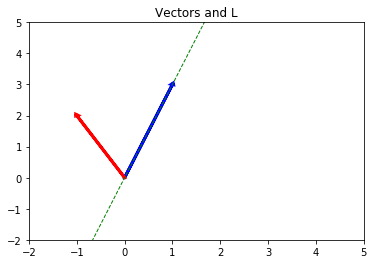

In [0]:
# Let's plot these two vectors first
plt.xlim(-2, 5)
plt.ylim(-2,5)

# Values for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot vectors and L
plt.plot(x_vals, y_vals, '--', color='green', linewidth=1)
plt.arrow(0, 0, v[0], v[1] ,linewidth=3, head_width=.05, head_length=.05, color='blue')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=.05, color='red')

plt.title("Vectors and L")
plt.show()

In [0]:
v_dot_w = np.dot(v, w)
v_dot_v = np.dot(v, v)
projection = np.multiply((v_dot_w / v_dot_v), v)
projection

array([0.5, 1.5])

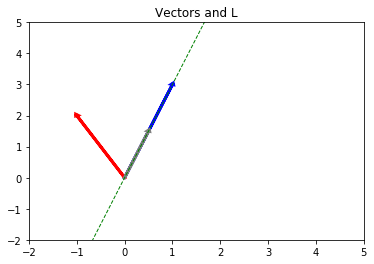

In [0]:
# Now that we can see our L and the v vector, let's project the w vector onto the L
plt.xlim(-2, 5)
plt.ylim(-2,5)

# Values for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot vectors, L, and projection
plt.plot(x_vals, y_vals, '--', color='green', linewidth=1)
plt.arrow(0, 0, v[0], v[1] ,linewidth=3, head_width=.05, head_length=.05, color='blue')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=.05, color='red')
plt.arrow(0, 0, projection[0], projection[1], linewidth=3, head_width=.05, head_length=.05, color='grey')

plt.title("Vectors and L")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

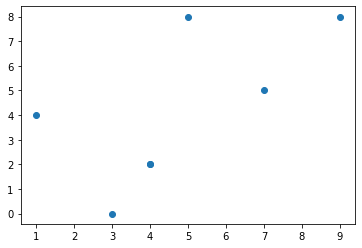

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

In [0]:
x_dot_y = df['x'].dot(df['y'])
x_dot_x = df['x'].dot(df['x'])
fract = x_dot_y / x_dot_x
print(x_dot_y)
print(x_dot_x)
print(fract)

167
197
0.8477157360406091


In [0]:
projections = df['y'].multiply(fract)
projections

0    3.390863
1    1.695431
2    4.238579
3    0.000000
4    6.781726
5    1.695431
6    6.781726
Name: y, dtype: float64